In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df=pd.read_csv('bankloan.csv')
df=df.drop('Loan_ID',axis=1)
df=df.dropna()
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [3]:
pre_Y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_Y=pre_Y.map(dict(Y=1,N=0))
dm_X=pd.get_dummies(pre_X)

In [4]:
X_min=dm_X.min(axis=0)
X_max=dm_X.max(axis=0)
print(X_min)
print(X_max)

Dependents                    0.0
ApplicantIncome             150.0
CoapplicantIncome             0.0
LoanAmount                 9000.0
Loan_Amount_Term             36.0
Credit_History                0.0
Gender_Female                 0.0
Gender_Male                   0.0
Married_No                    0.0
Married_Yes                   0.0
Education_Graduate            0.0
Education_Not Graduate        0.0
Self_Employed_No              0.0
Self_Employed_Yes             0.0
Property_Area_Rural           0.0
Property_Area_Semiurban       0.0
Property_Area_Urban           0.0
dtype: float64
Dependents                      3.0
ApplicantIncome             81000.0
CoapplicantIncome           33837.0
LoanAmount                 600000.0
Loan_Amount_Term              480.0
Credit_History                  1.0
Gender_Female                   1.0
Gender_Male                     1.0
Married_No                      1.0
Married_Yes                     1.0
Education_Graduate              1.0
Education_N

In [5]:
smote=SMOTE(random_state=42)
X,Y = smote.fit_sample(dm_X,dm_Y)
sc=MinMaxScaler()
X=sc.fit_transform(X)
Counter(Y)

Counter({0: 332, 1: 332})

In [6]:
xtrn,xtst,ytrn,ytst=train_test_split(X,Y,test_size=0.2, random_state=42, shuffle=True)

In [7]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=xtst.shape[1]))
model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrn,ytrn, batch_size=20, epochs=50, verbose=0)

W0622 12:28:15.162061  1992 deprecation.py:506] From c:\users\user\anaconda3\envs\venv\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0622 12:28:15.542083  1992 deprecation.py:323] From c:\users\user\anaconda3\envs\venv\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0622 12:28:21.147403  1992 module_wrapper.py:139] From c:\users\user\anaconda3\envs\venv\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [8]:
eval_model_on_train=model.evaluate(xtrn,ytrn)
print(eval_model_on_train)
eval_model_on_test=model.evaluate(xtst,ytst)
print(eval_model_on_test)

531/531 [==============================] - 0s 352us/step
[0.31221438761933823, 0.8888888955116272]
133/133 [==============================] - 0s 226us/step
[0.5196288151848585, 0.8571428656578064]


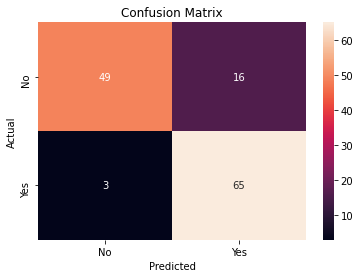

In [9]:
ypred=model.predict(xtst)
ypred=(ypred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytst,ypred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['No','Yes']);

In [10]:
import pickle
import joblib
joblib.dump(model,'loan_model.pkl')

['loan_model.pkl']